This notebook does 3 things:

1. Visualize few images. It's a bad idea to use file explorer of jupyter lab/notebook when we have 40k images in a folder.

2. Dataloaders for loading images. (⌐■_■)

In [7]:
import os
import sys
import random

from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [9]:
os.listdir('data')

['train.csv',
 'tfrecords',
 'test.csv',
 'jpeg',
 'train',
 'sample_submission.csv',
 '.ipynb_checkpoints',
 'test']

In [42]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [43]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


## visualize an images

In [51]:
os.listdir('./data/jpeg/train')[:10]

['ISIC_5581297.jpg',
 'ISIC_7295186.jpg',
 'ISIC_9974299.jpg',
 'ISIC_7524426.jpg',
 'ISIC_6438174.jpg',
 'ISIC_2593795.jpg',
 'ISIC_2649657.jpg',
 'ISIC_2391053.jpg',
 'ISIC_7670304.jpg',
 'ISIC_1064163.jpg']

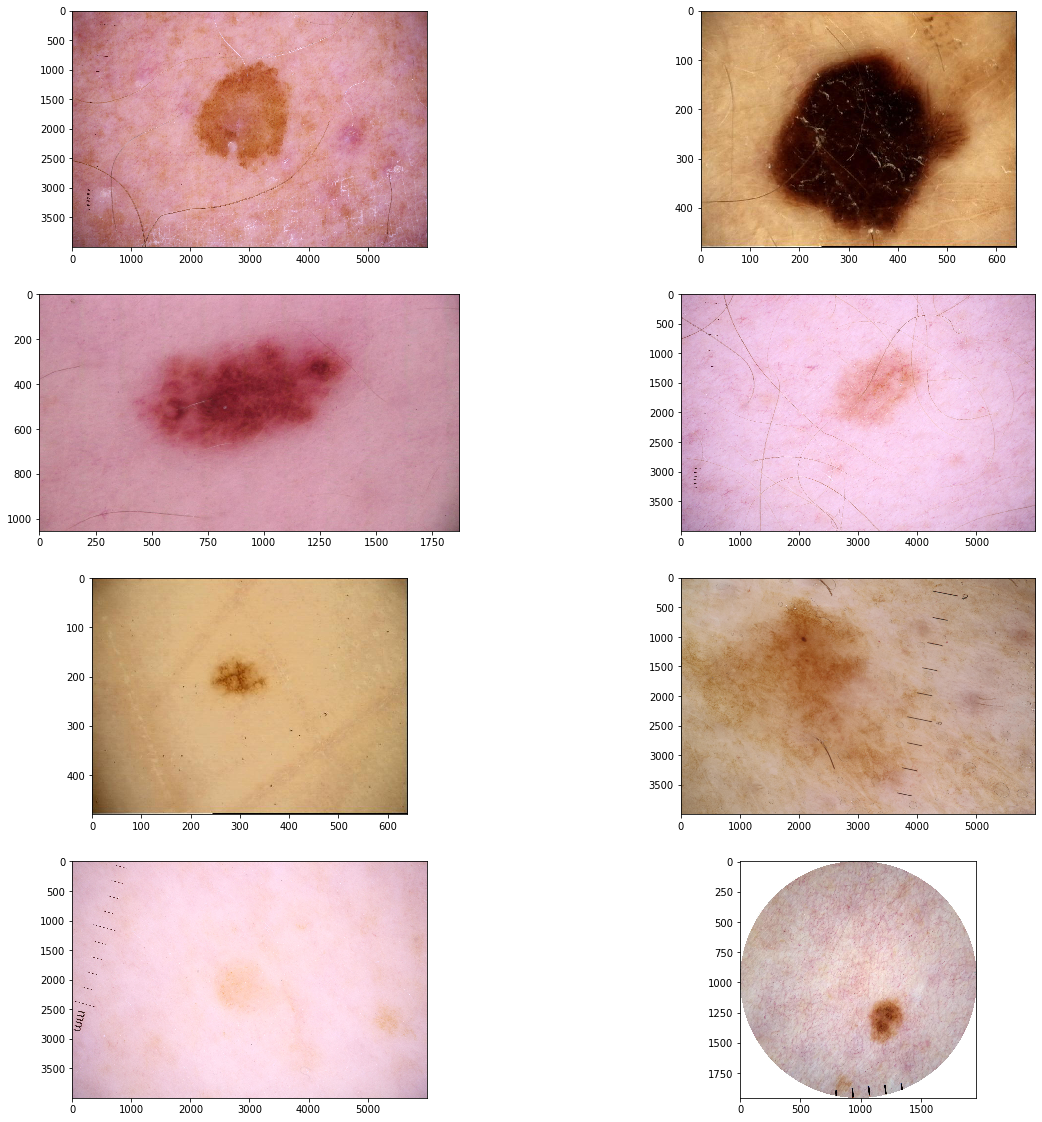

In [59]:
plt.figure(figsize=(20,20))
for i in range(8):
    img_name = random.choice(os.listdir('./data/jpeg/train'))
    plt.subplot(4,2, i+1)
    plt.imshow(io.imread(f'data/jpeg/train/{img_name}'))

## Dataset

In [3]:
tfms = transforms.Compose([transforms.Resize(size = (224,224)), transforms.ToTensor()])

In [29]:

class MelanomaDataset(Dataset):
    
    def __init__(self, train_or_test, tfms):
        if train_or_test == 'train':
            self.df = pd.read_csv('data/train.csv')
        elif train_or_test == 'test':
            self.df = pd.read_csv('data/test.csv')
        
        self.train_or_test = train_or_test
        self.tfms = tfms
        
    
    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, idx):
        img_fn = self.df.iloc[idx]['image_name']
        img = Image.open(f'data/jpeg/{self.train_or_test}/{img_fn}.jpg')
        if self.tfms:  # transformation
            img = self.tfms(img)
        if self.train_or_test=='train':
            target = np.array([self.df.iloc[idx]['target']])
            target = torch.tensor(target, dtype=torch.float32)
            return {'image':img, 'class' : target}

        elif self.train_or_test=='test':
            return {'image':img}